In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/SkinCancerMNIST/SkinCancer_images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/SkinCancerMNIST/SkinCancer_masks.npy')

In [3]:
images.shape

(12311, 512, 512, 1)

In [4]:
images.nbytes

12909019136

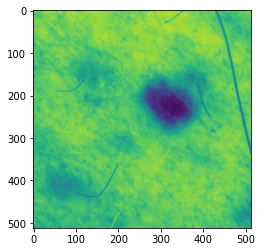

In [5]:
imshow(images[100])

In [8]:
masks.shape

(12311, 512, 512, 1)

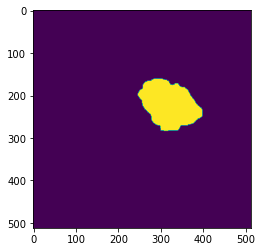

In [9]:
imshow(masks[100])

In [10]:
import sys
sys.path.append('../')
import gp2

In [11]:
C = gp2.KUC_UNet2D()

*** GP2  KUC U-Net2D ***
Working directory: /tmp


In [12]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}
PERCENT_TO_REPLACE = 30

In [13]:
from runner import Runner
R = Runner(verbose=True)

*** GP2 ***
Working directory: /tmp/tmp8k835iplGP2
Verbose mode active!


In [14]:
R.classifier = C ### use custom classifier

In [15]:
R.setup_data(images, masks, dataset_size=10000, weights=weights)


Weights OK!


In [16]:
R.run_classifier(batch_size=16)

Epoch 1/100
32/32 [==============================] - 33s 771ms/step - loss: 0.4562 - dice_coeff: 0.5207 - val_loss: 1.0384 - val_dice_coeff: 0.4328
Epoch 2/100
32/32 [==============================] - 20s 618ms/step - loss: 0.3734 - dice_coeff: 0.5668 - val_loss: 3.1029 - val_dice_coeff: 0.4582
Epoch 3/100
32/32 [==============================] - 20s 618ms/step - loss: 0.3486 - dice_coeff: 0.6081 - val_loss: 10.7957 - val_dice_coeff: 0.4353
Epoch 4/100
32/32 [==============================] - 20s 630ms/step - loss: 0.3446 - dice_coeff: 0.6119 - val_loss: 3.0030 - val_dice_coeff: 0.5551
Epoch 5/100
32/32 [==============================] - 20s 621ms/step - loss: 0.3245 - dice_coeff: 0.6337 - val_loss: 1.4594 - val_dice_coeff: 0.3405
Epoch 6/100
32/32 [==============================] - 20s 620ms/step - loss: 0.3400 - dice_coeff: 0.6230 - val_loss: 7.0089 - val_dice_coeff: 0.4389
Epoch 7/100
32/32 [==============================] - 20s 618ms/step - loss: 0.3208 - dice_coeff: 0.6383 - val_l